<a href="https://colab.research.google.com/github/AnitaKirkovska/MachineLearning_HW1/blob/master/Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import cv2
import keras
from keras import backend as L
from keras.datasets import mnist
from scipy import ndimage
from skimage import util 
from keras.models import Sequential
from keras.layers import Dense, Input
from keras import layers, optimizers, Model
from keras.utils import to_categorical


In [0]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
dim = x_test_org.shape[1] * x_test_org.shape[2]

Rounding grey values to 1 and 0


In [0]:
for i in range(len(x_train_org)):
  img=x_train_org[i]
  threshold=150
  x_train_org[i]=cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)[1]
  
for i in range(len(x_test_org)):
  img=x_train_org[i]
  threshold=150
  x_test_org[i]=cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)[1]

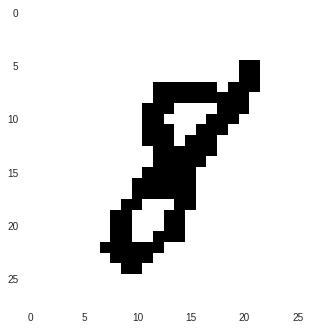

In [0]:
visualize = 8
index= -1
for i in range(len(y_train_org)):
  if y_train_org[i] == visualize:
    index =i
    break;
inverted=(x_train_org[index])
plt.grid(None)
plt.imshow(inverted)

Labeling components

In [0]:
train_comp = np.zeros_like(y_train_org)
test_comp = np.zeros_like(y_test_org)

for i in range(len(train_comp)):
  label,near_obj = ndimage.label(util.invert(x_train_org[i]))
  train_comp[i] = near_obj

for i in range(len(test_comp)):
  label,near_obj = ndimage.label(util.invert(x_train_org[i]))
  test_comp[i] = near_obj
  


In [0]:
if L.image_data_format() == 'channels_first':
  x_train_org = x_train_org.reshape(x_train_org.shape[0],1,x_train_org.shape[1],x_train_org.shape[2])
  x_test_org = x_test_org.reshape(x_test_org.shape[0],1,x_test_org.shape[1],x_test_org.shape[2])
  input = (1,x_test_org.shape[1],x_test_org.shape[2]) #shape
  
else:
  x_train_org = x_train_org.reshape(x_train_org.shape[0],x_train_org.shape[1],x_train_org.shape[2],1)
  x_test_org = x_test_org.reshape(x_test_org.shape[0],x_test_org.shape[1],x_test_org.shape[2],1)
  input = (1,x_test_org.shape[1],x_test_org.shape[2]) #shape

In [0]:
x_train_org=np.asfarray(x_train_org)/255.0
x_test_org=np.asfarray(x_test_org)/255.0

y_train_org = to_categorical(y_train_org,10)
y_test_org = to_categorical(y_test_org,10)

train_comp = train_comp/4
test_comp = train_comp/4

In [0]:
x_train_org = x_train_org.reshape(x_train_org.shape[0],-1)
x_test_org = x_test_org.reshape(x_test_org.shape[0],-1)
y_train_org = y_train_org.T
y_train_org = y_train_org.T

Input layer, added feature vector and output layer (10 layers)

In [0]:
added_feature = 1
input_shape = Input((dim,))
feature_comp = Input((added_feature,))
img_vector = Dense(64, activation="sigmoid")(input_shape)
output = layers.add([img_vector, feature_comp])
output = Dense(10, activation="softmax")(output)
output = Model([input_shape, feature_comp], output)


#gradient descent
sgd = optimizers.SGD(lr=0.1)
output.compile(optimizer = sgd,
               loss="categorical_crossentropy",
               metrics=["accuracy"])
output.fit([x_train_org, train_comp], y_train_org, nb_epoch=5, batch_size=32)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.5547 - acc: 0.8552
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2854 - acc: 0.9201
Epoch 3/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2396 - acc: 0.9323
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2100 - acc: 0.9407
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.1888 - acc: 0.9455
